In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv(r'C:\Users\Hp\Desktop\data_science_full_course\machine_learning\USA_Housing.csv')

In [62]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [63]:
#information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [64]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [65]:
#preprocessing - 1. missing value treatment
df.isnull().sum()/len(df)*100


Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

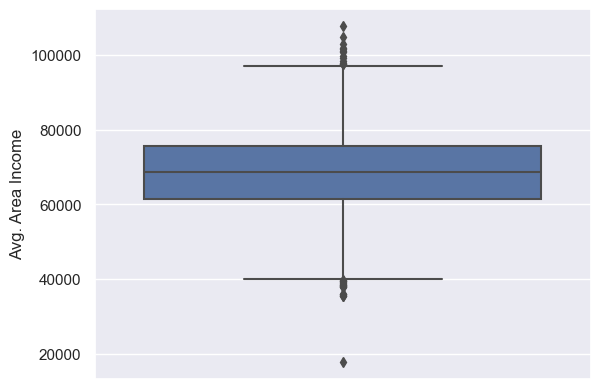

In [66]:
#check outlier an then will decide whether we have to use mean or median approach

sns.boxplot(y= 'Avg. Area Income', data = df)
df['Avg. Area Income'] = df['Avg. Area Income'].fillna(df['Avg. Area Income'].median())


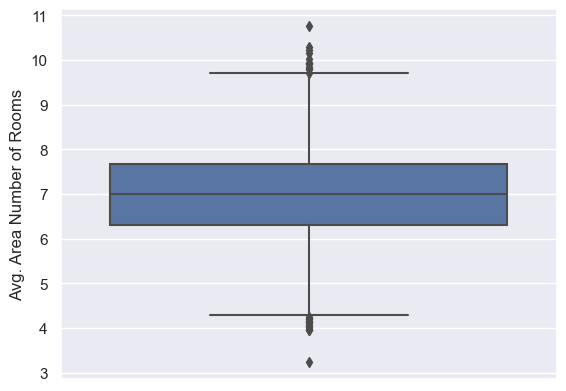

In [67]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data = df)

df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median())

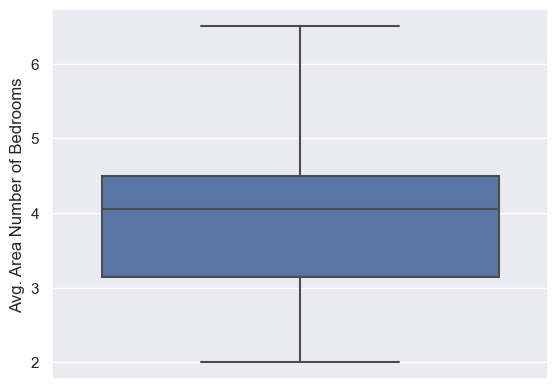

In [68]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms',data = df)
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].mean())

In [69]:
#by inputation method(median)
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [70]:
#part 2 Encoding concept 

df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [71]:

#address is non-significant variable to predict usa Housing price.hence we have to drop this variable
df = df.iloc[:,0:-1]

In [72]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


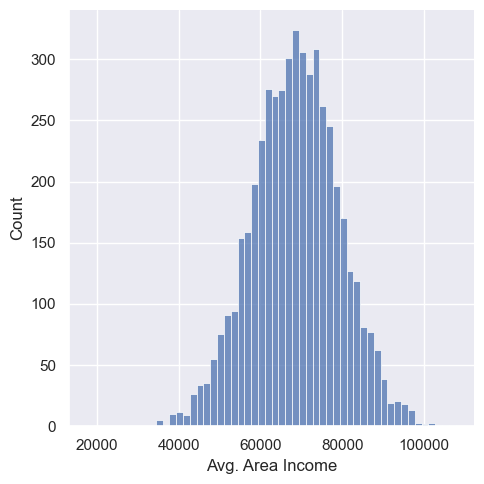

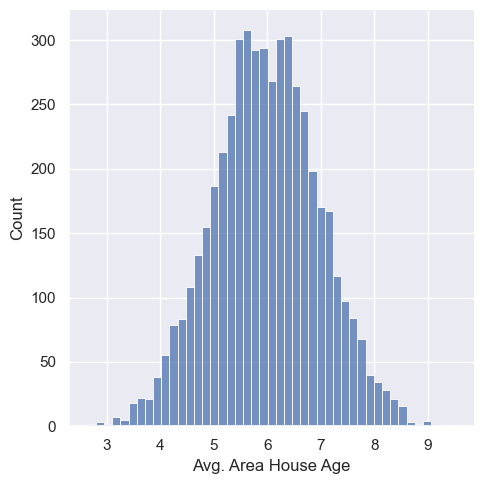

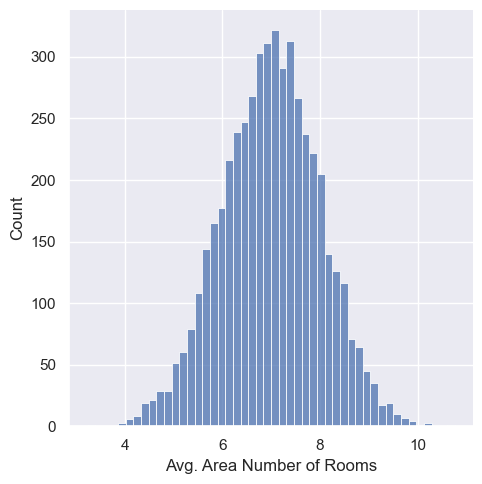

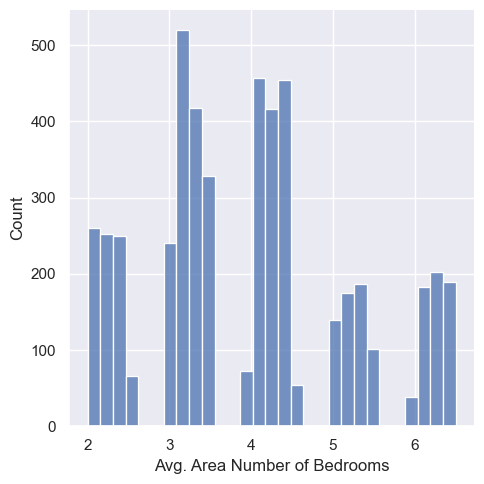

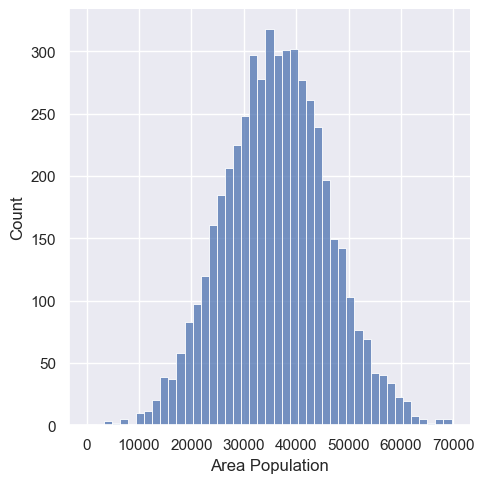

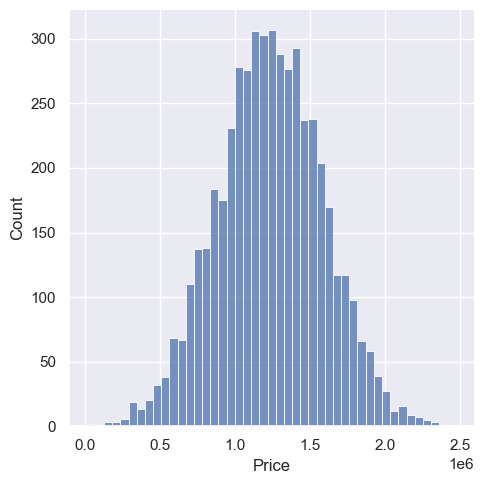

In [73]:
#part3 -handling outlier

def displots(col):
    sns.displot(df[col])
    plt.show()
    
for i in list(df.columns)[0:]:
    displots(i)
    


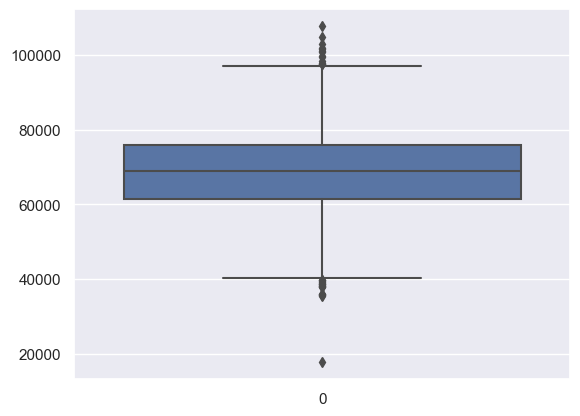

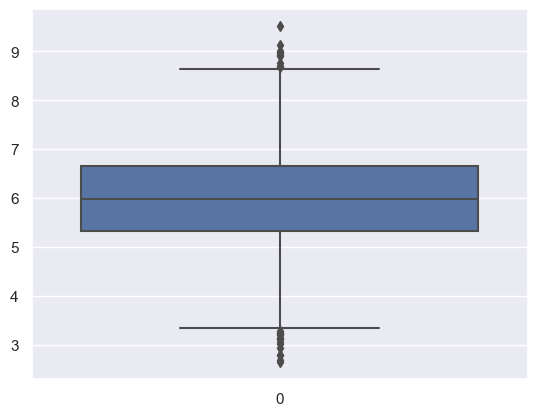

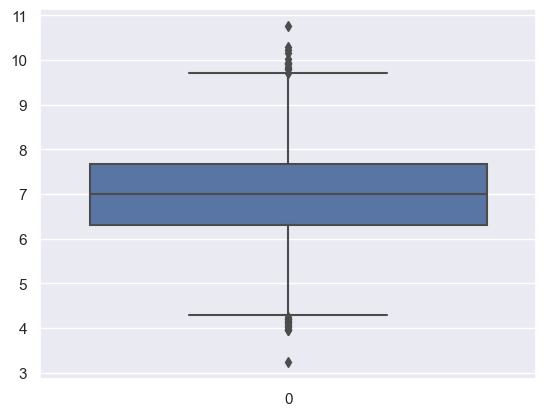

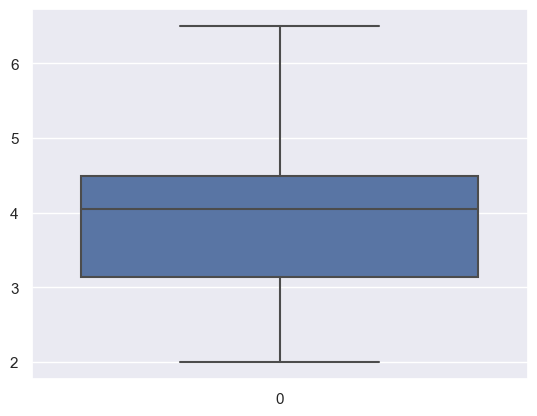

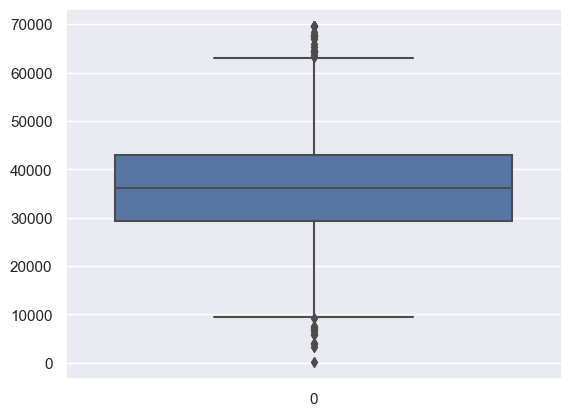

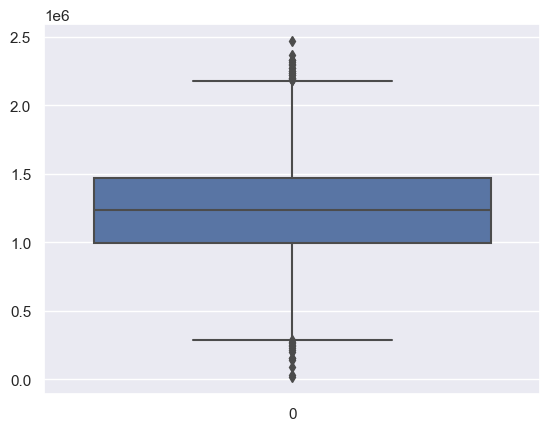

In [74]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for  i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplot(i)
    

In [75]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [76]:
#use capping method -one by one to handle the dataset
#trimmed method 


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3-Q1

pos_outlier = Q3 + 1.5*IQR
neg_outlier = Q1 - 1.5*IQR

In [77]:
print(Q1)
print("****************"*5)
print(Q3)
print("****************"*5)
print(IQR)
print("****************"*5)
print(pos_outlier)
print("****************"*5)
print(neg_outlier)
print("****************"*5)

Avg. Area Income                 61485.150192
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299692
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928700
Price                           997577.135075
Name: 0.25, dtype: float64
********************************************************************************
Avg. Area Income                7.576652e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665281e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
********************************************************************************
Avg. Area Income                 14281.368910
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.365589
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362070
Price   

In [78]:
df1 = df.copy()

In [79]:
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [80]:
#'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population'

In [81]:
income_q1 = df1['Avg. Area Income'].quantile(0.25)
income_q3 = df1['Avg. Area Income'].quantile(0.75)
income_iqr = income_q3 - income_q1
income_upper = income_q3 + 1.5*income_iqr
income_lower = income_q1 - 1.5*income_iqr


In [82]:
df1['Avg. Area Income'] = np.where(df1['Avg. Area Income'] > income_upper,income_upper,
                                      np.where(df1['Avg. Area Income']< income_lower,income_lower,
                                              df1['Avg. Area Income']) )

In [83]:
age_q1 = df1['Avg. Area House Age'].quantile(0.25)
age_q3 = df1['Avg. Area House Age'].quantile(0.75)
age_iqr = income_q3 - income_q1
age_upper = income_q3 + 1.5*income_iqr
age_lower = income_q1 - 1.5*income_iqr


In [84]:
df1['Avg. Area House Age'] = np.where(df1['Avg. Area House Age'] > age_upper,age_upper,
                                      np.where(df1['Avg. Area House Age']< age_lower,age_lower,
                                              df1['Avg. Area House Age']) )

In [85]:
no_q1 = df1['Avg. Area Number of Rooms'].quantile(0.25)
no_q3 = df1['Avg. Area Number of Rooms'].quantile(0.75)
no_iqr = income_q3 - income_q1
no_upper = income_q3 + 1.5*income_iqr
no_lower = income_q1 - 1.5*income_iqr


In [86]:
df1['Avg. Area House Age'] = np.where(df1['Avg. Area House Age'] > no_upper,no_upper,
                                      np.where(df1['Avg. Area House Age']< no_lower,no_lower,
                                              df1['Avg. Area House Age']) )

In [87]:
pop_q1 = df1['Area Population'].quantile(0.25)
pop_q3 = df1['Area Population'].quantile(0.75)
pop_iqr = income_q3 - income_q1
pop_upper = income_q3 + 1.5*income_iqr
pop_lower = income_q1 - 1.5*income_iqr


In [88]:
df1['Avg. Area House Age'] = np.where(df1['Avg. Area House Age'] > pop_upper,pop_upper,
                                      np.where(df1['Avg. Area House Age']< pop_lower,pop_lower,
                                              df1['Avg. Area House Age']) )

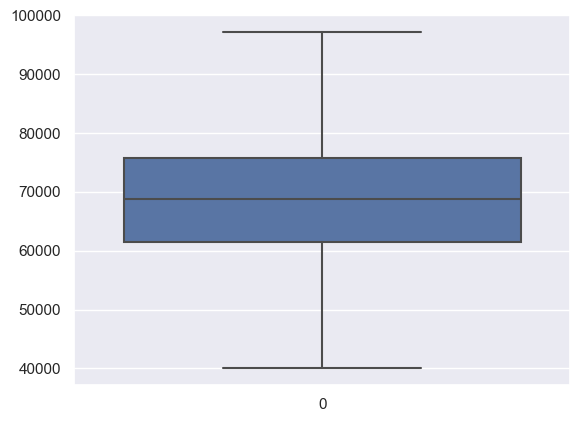

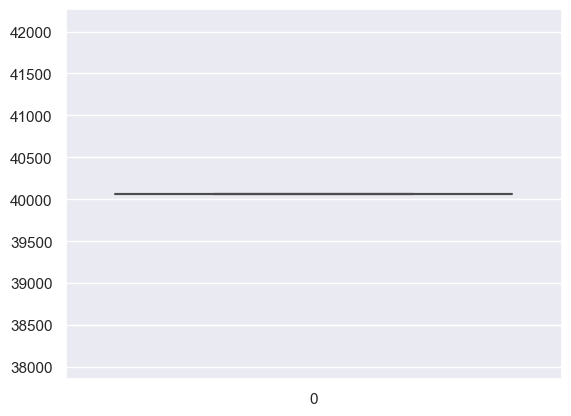

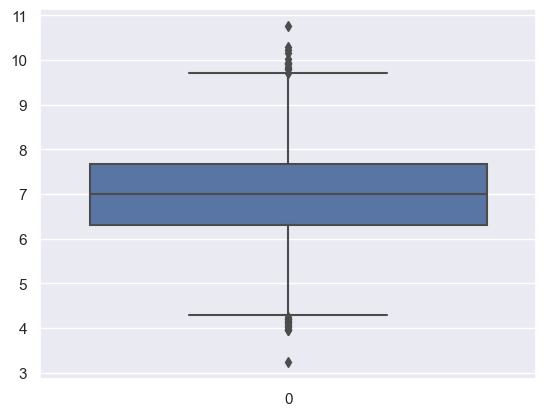

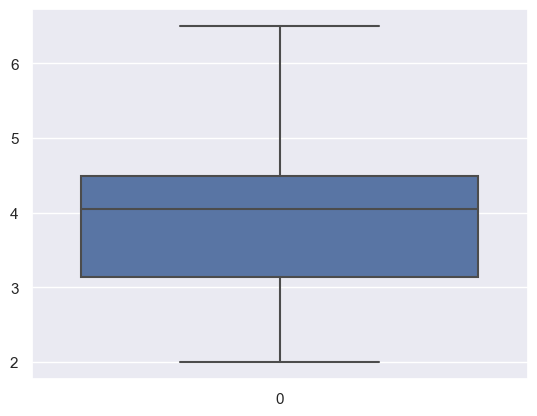

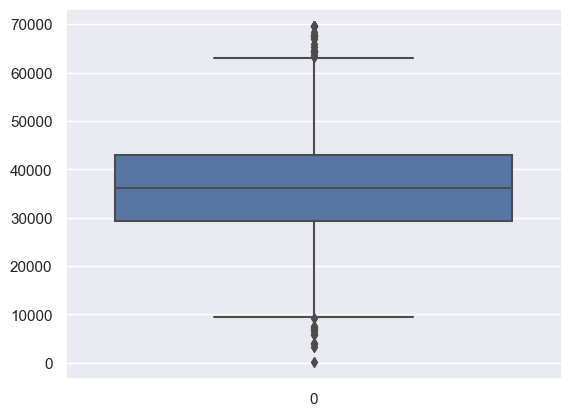

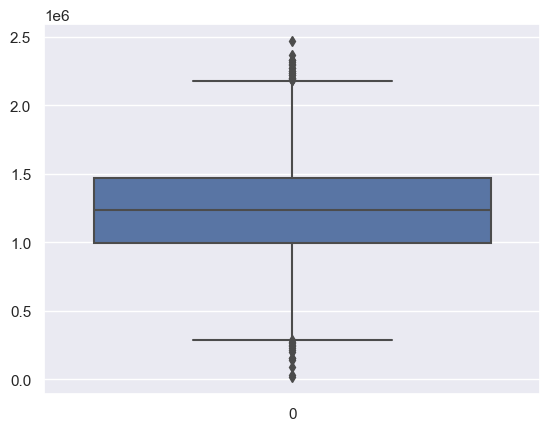

In [89]:
def boxplot(col):
    sns.boxplot(df1[col])
    plt.show()
    
for  i in list(df1.select_dtypes(exclude=['object']).columns)[0:]:
    boxplot(i)